<a href="https://colab.research.google.com/github/JmarcoRT/quimicaPC1/blob/main/PC8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Generar datos usando drawdata para obtener:

(a) Ley de Boyle

In [58]:
!pip install drawdata

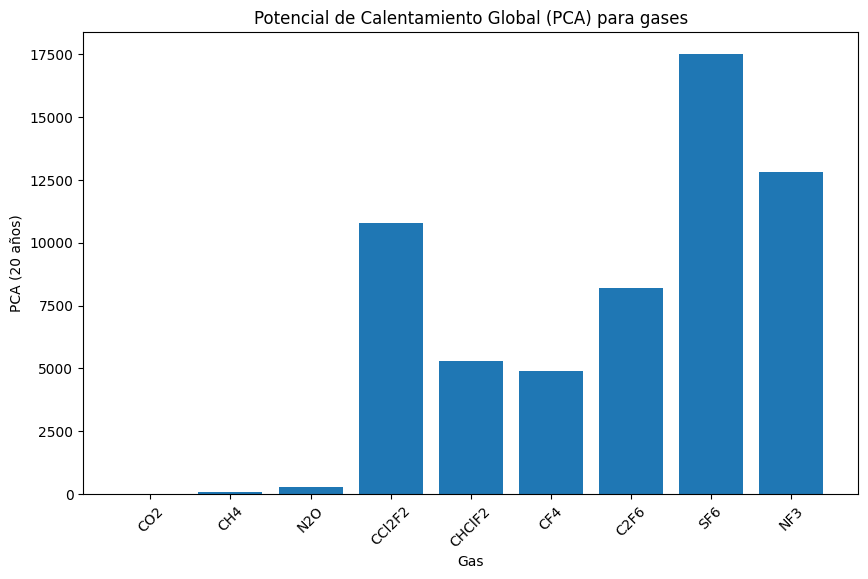

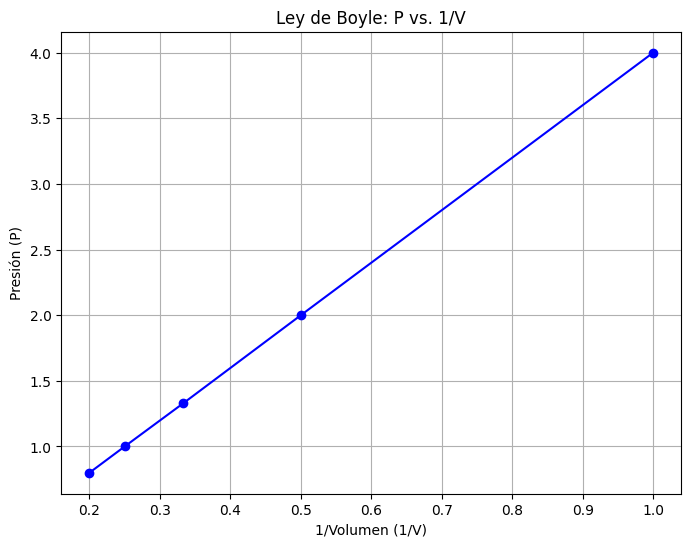

In [59]:
import pandas as pd
import matplotlib.pyplot as plt


FormulaQuimica = ["CO2", "CH4", "N2O", "CCl2F2", "CHClF2", "CF4", "C2F6", "SF6", "NF3"]
PCA = [1, 84, 264, 10800, 5280, 4880, 8210, 17500, 12800]


df = pd.DataFrame({"Gas": FormulaQuimica, "PCA (20 años)": PCA})


plt.figure(figsize=(10, 6))
plt.bar(df["Gas"], df["PCA (20 años)"])
plt.xlabel("Gas")
plt.ylabel("PCA (20 años)")
plt.title("Potencial de Calentamiento Global (PCA) para gases")
plt.xticks(rotation=45)
plt.show()


V = [1, 2, 3, 4, 5]  # Volum
P = [4, 2, 1.33, 1, 0.8]  # Pres


inv_V = [1 / v for v in V]


plt.figure(figsize=(8, 6))
plt.plot(inv_V, P, marker='o', linestyle='-', color='b')
plt.xlabel('1/Volumen (1/V)')
plt.ylabel('Presión (P)')
plt.title('Ley de Boyle: P vs. 1/V')
plt.grid(True)
plt.show()

(b) Ley de Charles

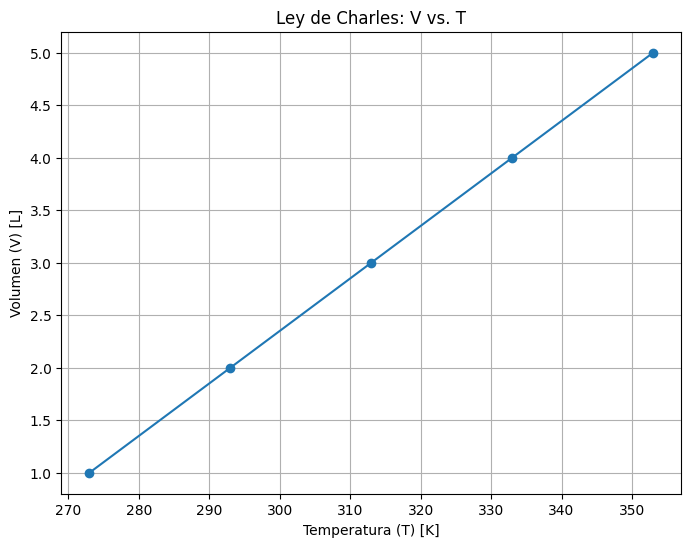

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos
volumen_charles = [1.0, 2.0, 3.0, 4.0, 5.0]  # Volum
temperatura_charles = [273, 293, 313, 333, 353]  # Temp

df_charles = pd.DataFrame({'Volumen (V)': volumen_charles, 'Temperatura (T)': temperatura_charles})

plt.figure(figsize=(8, 6))
plt.plot(df_charles['Temperatura (T)'], df_charles['Volumen (V)'], marker='o', linestyle='-')
plt.xlabel('Temperatura (T) [K]')
plt.ylabel('Volumen (V) [L]')
plt.title('Ley de Charles: V vs. T')
plt.grid(True)
plt.show()







(c) Ley de Gay Lussac


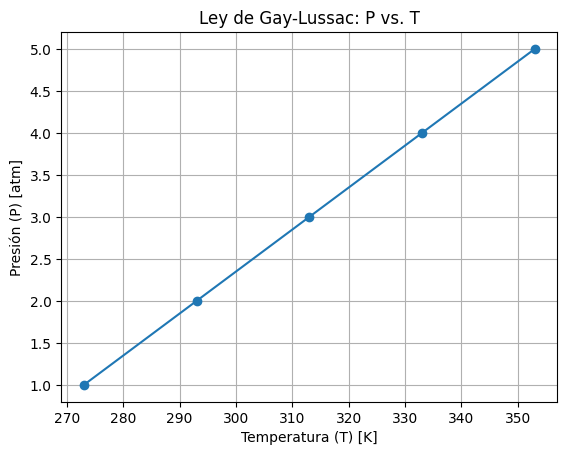

In [61]:
import pandas as pd
import matplotlib.pyplot as plt




presion_gay_lussac = [1.0, 2.0, 3.0, 4.0, 5.0]
temperatura_gay_lussac = [273, 293, 313, 333, 353]


df_gay_lussac = pd.DataFrame({'Presión (P)': presion_gay_lussac, 'Temperatura (T)': temperatura_gay_lussac})

# Gráfica de la Ley de Gay-Lussac (P vs. T)plt.figure(figsize=(8, 6))
plt.plot(df_gay_lussac['Temperatura (T)'], df_gay_lussac['Presión (P)'], marker='o', linestyle='-')
plt.xlabel('Temperatura (T) [K]')
plt.ylabel('Presión (P) [atm]')
plt.title('Ley de Gay-Lussac: P vs. T')
plt.grid(True)
plt.show()




(d) Velocidad vs Número de moléculas


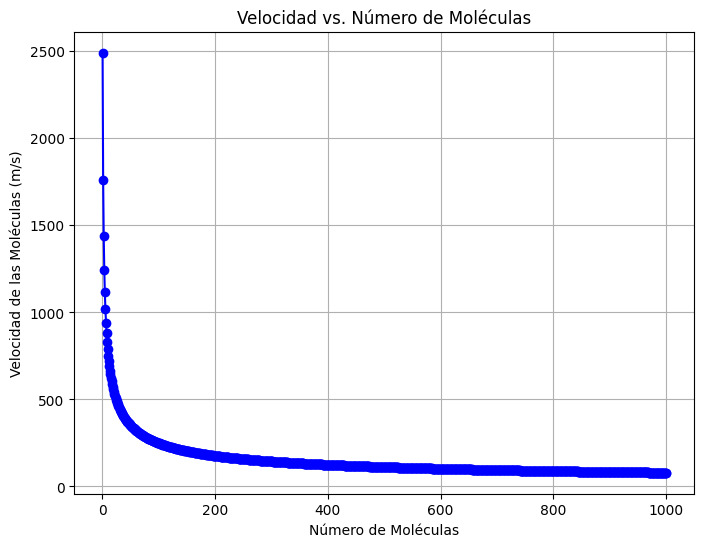

In [62]:
import numpy as np
import matplotlib.pyplot as plt


k = 1.38e-23
T = 300  # Temp
m = 2.0e-27

num_moleculas = np.arange(1, 1001)
velocidades = np.sqrt((3 * k * T) / (m)) / np.sqrt(num_moleculas)

plt.figure(figsize=(8, 6))
plt.plot(num_moleculas, velocidades, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Moléculas')
plt.ylabel('Velocidad de las Moléculas (m/s)')
plt.title('Velocidad vs. Número de Moléculas')
plt.grid(True)
plt.show()

2. Extraer datos químicos sobre gases disponibles en la web y hacer una exploración gráfica y estadística

In [63]:
!pip install pandas
!pip install matplotlib
!pip install beautifulsoup4

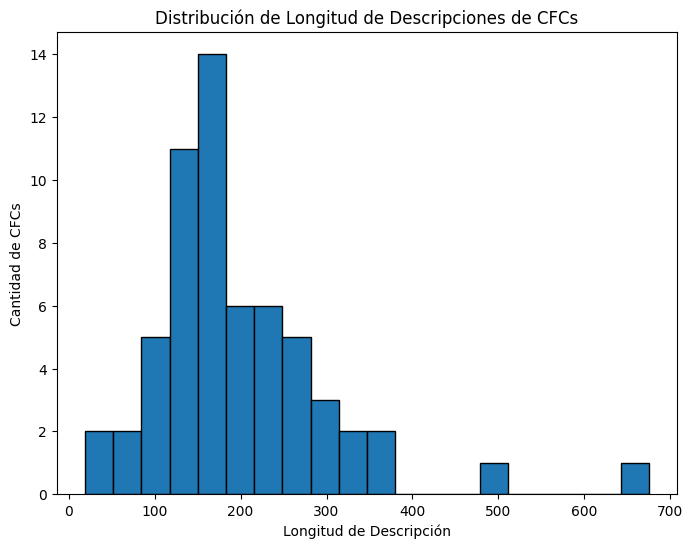

count     60.000000
mean     195.583333
std      106.672521
min       19.000000
25%      129.000000
50%      169.500000
75%      232.250000
max      675.000000
Name: Longitud de la Descripción, dtype: float64
                                         Información  \
0  ^ "Climate Change". The White House. 19 March ...   
1  ^ Mironov, O. G. (1968). "Hydrocarbon pollutio...   
2  ^ Darby, Megan (19 August 2014). "Ozone layer ...   
3  ^ https://www.gab-neumann.com/applications/$/H...   
4  ^ Siegemund, Günter et al. (2002) "Fluorine Co...   

   Longitud de la Descripción  
0                         122  
1                         223  
2                         170  
3                          68  
4                         165  


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup


url = 'https://en.wikipedia.org/wiki/Chlorofluorocarbon'

response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

cfc_section = soup.find('div', {'class': 'reflist'})

data = []
for row in cfc_section.find_all('li'):
    text = row.get_text()
    data.append(text)

df = pd.DataFrame(data, columns=['Información'])

df['Longitud de la Descripción'] = df['Información'].apply(len)

plt.figure(figsize=(8, 6))
plt.hist(df['Longitud de la Descripción'], bins=20, edgecolor='k')
plt.title('Distribución de Longitud de Descripciones de CFCs')
plt.xlabel('Longitud de Descripción')
plt.ylabel('Cantidad de CFCs')
plt.show()

print(df['Longitud de la Descripción'].describe())
print(df.head())